#**Mall Customer Segmentation**

**Importing the Data**

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

**Importing the libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [5]:
dataSet = pd.read_csv('/content/drive/My Drive/data/Mall_Customers.csv')

In [6]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataSet.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Males:	 88
Females: 112


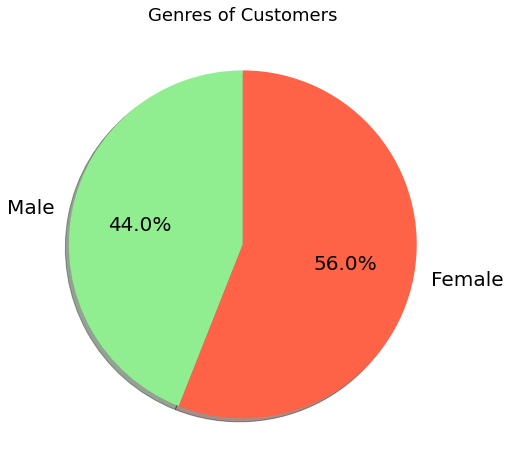

In [24]:
male = dataSet[dataSet['Genre'] == 'Male'].shape[0]
female = dataSet[dataSet['Genre'] == 'Female'].shape[0]

print('Males:\t', male)
print('Females:', female)

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Genres of Customers', size=18)
plt.pie([male, female], labels=['Male', 'Female'], colors=['lightgreen', 'tomato'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

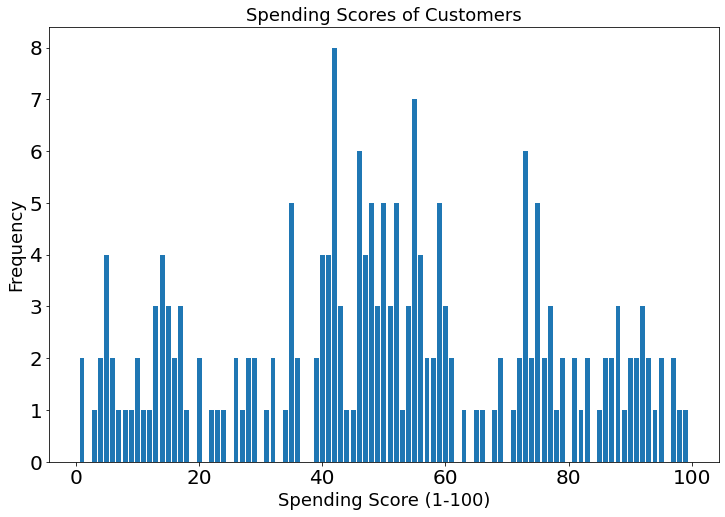

In [37]:
plt.figure(figsize=(12, 8))
plt.bar(dict(dataSet['Spending Score (1-100)'].value_counts()).keys(), dict(dataSet['Spending Score (1-100)'].value_counts()).values())
plt.title('Spending Scores of Customers', size=18)
plt.xlabel('Spending Score (1-100)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

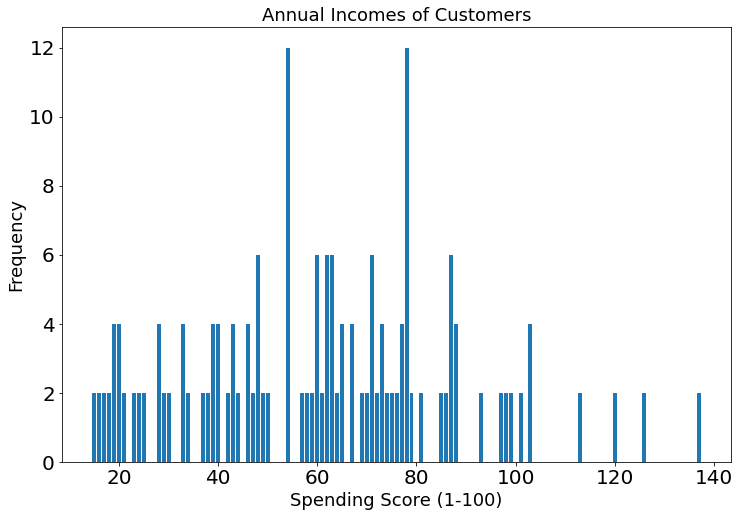

In [39]:
plt.figure(figsize=(12, 8))
plt.bar(dict(dataSet['Annual Income (k$)'].value_counts()).keys(), dict(dataSet['Annual Income (k$)'].value_counts()).values())
plt.title('Annual Incomes of Customers', size=18)
plt.xlabel('Spending Score (1-100)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [41]:
X = dataSet.iloc[:, [3, 4]].values

**Using the dendrogram to find the optimal number of clusters**

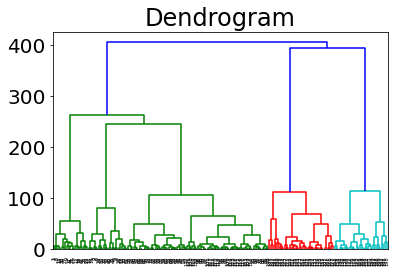

In [62]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

**Training the Hierarchical Clustering model on the dataset**

In [45]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y = hc.fit_predict(X)

**Visualising the clusters**

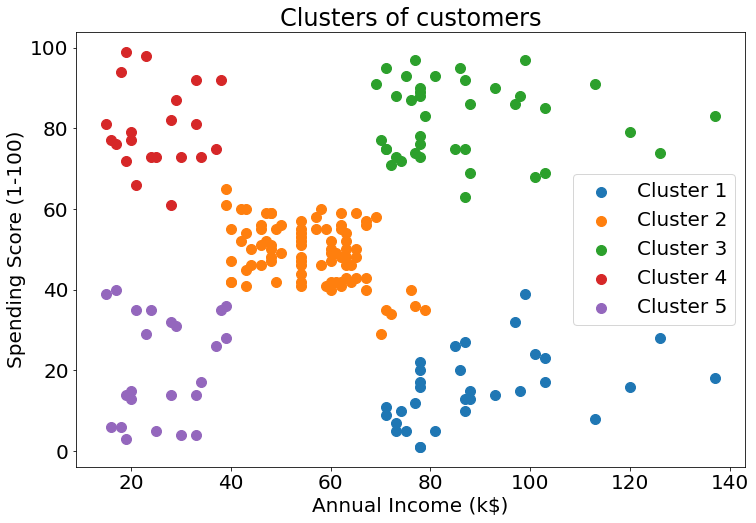

In [64]:
plt.figure(figsize=(12, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [59]:
dataSet['Cluster'] = y
dataSet

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
